In [367]:
## Kütüphanelerin eklenmesi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [368]:
# Masraf tahmini yapılacak olan bireyler hakkında bilgiler

dataFrame = pd.read_csv("insurance.csv")
dataFrame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [369]:
dataFrame.max()

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

In [370]:
dataFrame.describe() # sayısal olan değerlerin bilgileri
# bmi ideal olan vücut-kitle endeksi --> 18,5-24,9

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [371]:
dataFrame.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [372]:
dataFrame[dataFrame.charges <=30000].groupby("age").mean()["charges"]

age
18     4365.799197
19     5344.225276
20     7128.673363
21     4730.464330
22     2551.017880
23     7041.858583
24     6505.990734
25     6533.470656
26     5024.514431
27     8115.860483
28     6464.251748
29     8033.245230
30     8237.147151
31     5803.751912
32     7057.753898
33     8288.797134
34     8035.406010
35     8822.689067
36     6975.778129
37     9319.853407
38     6692.462406
39    10598.007651
40     9548.884835
41     7231.203194
42     9904.942329
43    12850.625807
44     8546.210730
45     9997.101119
46     9811.607451
47    13636.250504
48    12506.160210
49    11694.835607
50    11922.774241
51    10881.032394
52    14948.792192
53    13795.007723
54    13610.809377
55    12196.680565
56    12622.015081
57    13973.848308
58    12478.196181
59    14687.340696
60    13805.258760
61    16473.305527
62    15836.016452
63    15708.483875
64    17071.120685
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Count'>

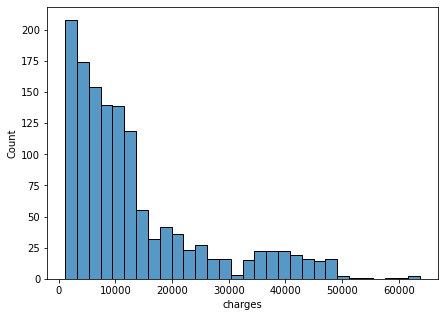

In [373]:
plt.figure(figsize=(7,5))
sbn.histplot(dataFrame["charges"])

C:\Users\menes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges', ylabel='count'>

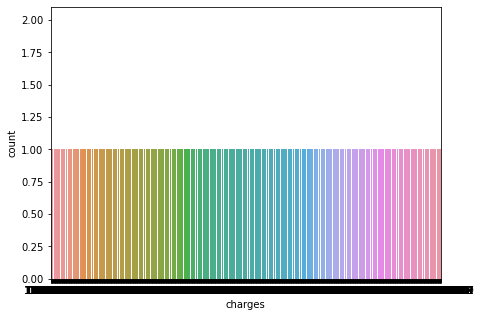

In [46]:
plt.figure(figsize=(7,5))
sbn.countplot(dataFrame["charges"])

In [374]:
dataFrame.sort_values("charges",ascending=False).head(162)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...
387,50,male,25.365,2,no,northwest,30284.64294
115,60,male,28.595,0,no,northeast,30259.99556
92,59,male,29.830,3,yes,northeast,30184.93670
62,64,male,24.700,1,no,northwest,30166.61817


In [375]:
## silinecek değer sayısı
len(dataFrame) * 0.12

160.56

In [376]:
dataFrame = dataFrame.sort_values("charges",ascending=False).iloc[162:]
dataFrame.head()

,age,sex,bmi,children,smoker,region,charges
244,63,female,27.740,0,yes,northeast,29523.16560
890,64,female,26.885,0,yes,northwest,29330.98315
696,53,female,32.300,2,no,northeast,29186.48236
1337,61,female,29.070,0,yes,northwest,29141.36030
419,63,female,26.980,0,yes,northwest,28950.46920


In [377]:
dataFrame.corr()["charges"].sort_values()

bmi        -0.079617
children    0.098983
age         0.513973
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Count'>

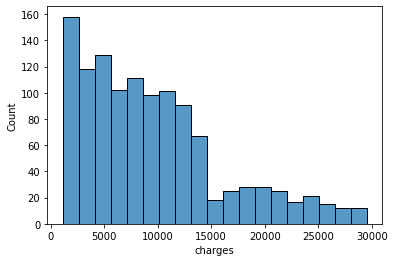

In [378]:
sbn.histplot(dataFrame["charges"])

In [379]:
dataFrame.sort_values("charges",ascending=True).head()

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110


In [380]:
dataFrame.head()

,age,sex,bmi,children,smoker,region,charges
244,63,female,27.740,0,yes,northeast,29523.16560
890,64,female,26.885,0,yes,northwest,29330.98315
696,53,female,32.300,2,no,northeast,29186.48236
1337,61,female,29.070,0,yes,northwest,29141.36030
419,63,female,26.980,0,yes,northwest,28950.46920


In [381]:
dataFrame = dataFrame.drop("sex",axis = 1)

In [382]:
dataFrame = dataFrame.drop("smoker",axis = 1)
dataFrame = dataFrame.drop("region",axis = 1)

In [383]:
dataFrame.head()

,age,bmi,children,charges
244,63,27.740,0,29523.16560
890,64,26.885,0,29330.98315
696,53,32.300,2,29186.48236
1337,61,29.070,0,29141.36030
419,63,26.980,0,28950.46920


In [384]:
dataFrame.describe()

,age,bmi,children,charges
count,1176.000000,1176.000000,1176.000000,1176.000000
mean,39.045918,30.087300,1.085034,9483.412419
std,13.989404,6.041278,1.214626,6565.954307
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.786250,0.000000,4348.852338
50%,39.000000,29.700000,1.000000,8246.436950
75%,51.000000,33.888750,2.000000,12629.348375
max,64.000000,53.130000,5.000000,29523.165600




##### train/test

In [385]:
y = dataFrame["charges"].values
x = dataFrame.drop("charges",axis=1).values

y

array([29523.1656 , 29330.98315, 29186.48236, ...,  1135.9407 ,
        1131.5066 ,  1121.8739 ])

In [386]:
x

array([[63.   , 27.74 ,  0.   ],
       [64.   , 26.885,  0.   ],
       [53.   , 32.3  ,  2.   ],
       ...,
       [18.   , 33.33 ,  0.   ],
       [18.   , 30.14 ,  0.   ],
       [18.   , 23.21 ,  0.   ]])

In [387]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [388]:
scaler = MinMaxScaler()

In [389]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###### YSA LAYERS

In [390]:
x_train.shape

(823, 3)

In [391]:
model = Sequential()

model.add(Dense(9,activation="relu"))
model.add(Dense(9,activation="relu"))
model.add(Dense(9,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

#### Epochs

In [392]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=300)

Epoch 1/300
26/26 [==============================] - 0s 5ms/step - loss: 130284864.0000 - val_loss: 139385744.0000
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 130278816.0000 - val_loss: 139381408.0000
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 130275368.0000 - val_loss: 139378944.0000
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 130272808.0000 - val_loss: 139375792.0000
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 130268968.0000 - val_loss: 139370704.0000
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 130262920.0000 - val_loss: 139363024.0000
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 130253288.0000 - val_loss: 139350800.0000
Epoch 8/300
26/26 [==============================] - 0s 2ms/step - loss: 130238688.0000 - val_loss: 139332992.0000
Epoch 9/300
26/26 [==============================] - 0s 2ms/step - loss: 1302173

26/26 [==============================] - 0s 2ms/step - loss: 35369800.0000 - val_loss: 40863432.0000
Epoch 73/300
26/26 [==============================] - 0s 2ms/step - loss: 35241612.0000 - val_loss: 40705812.0000
Epoch 74/300
26/26 [==============================] - 0s 2ms/step - loss: 35144684.0000 - val_loss: 40563288.0000
Epoch 75/300
26/26 [==============================] - 0s 2ms/step - loss: 35070788.0000 - val_loss: 40434116.0000
Epoch 76/300
26/26 [==============================] - 0s 2ms/step - loss: 35010860.0000 - val_loss: 40324048.0000
Epoch 77/300
26/26 [==============================] - 0s 2ms/step - loss: 34947888.0000 - val_loss: 40253848.0000
Epoch 78/300
26/26 [==============================] - 0s 2ms/step - loss: 34909544.0000 - val_loss: 40154800.0000
Epoch 79/300
26/26 [==============================] - 0s 2ms/step - loss: 34863052.0000 - val_loss: 40090660.0000
Epoch 80/300
26/26 [==============================] - 0s 2ms/step - loss: 34823476.0000 - val_loss: 4

26/26 [==============================] - 0s 2ms/step - loss: 33094048.0000 - val_loss: 37835964.0000
Epoch 144/300
26/26 [==============================] - 0s 2ms/step - loss: 33061046.0000 - val_loss: 37818148.0000
Epoch 145/300
26/26 [==============================] - 0s 2ms/step - loss: 33035272.0000 - val_loss: 37806616.0000
Epoch 146/300
26/26 [==============================] - 0s 2ms/step - loss: 33015402.0000 - val_loss: 37747568.0000
Epoch 147/300
26/26 [==============================] - 0s 2ms/step - loss: 32981734.0000 - val_loss: 37727584.0000
Epoch 148/300
26/26 [==============================] - 0s 2ms/step - loss: 32954158.0000 - val_loss: 37704052.0000
Epoch 149/300
26/26 [==============================] - 0s 2ms/step - loss: 32927552.0000 - val_loss: 37669916.0000
Epoch 150/300
26/26 [==============================] - 0s 2ms/step - loss: 32900766.0000 - val_loss: 37636248.0000
Epoch 151/300
26/26 [==============================] - 0s 2ms/step - loss: 32876012.0000 - val

26/26 [==============================] - 0s 2ms/step - loss: 31464312.0000 - val_loss: 35906624.0000
Epoch 215/300
26/26 [==============================] - 0s 2ms/step - loss: 31444514.0000 - val_loss: 35861308.0000
Epoch 216/300
26/26 [==============================] - 0s 2ms/step - loss: 31429108.0000 - val_loss: 35842564.0000
Epoch 217/300
26/26 [==============================] - 0s 2ms/step - loss: 31428192.0000 - val_loss: 35867088.0000
Epoch 218/300
26/26 [==============================] - 0s 2ms/step - loss: 31389948.0000 - val_loss: 35785752.0000
Epoch 219/300
26/26 [==============================] - 0s 2ms/step - loss: 31375810.0000 - val_loss: 35783120.0000
Epoch 220/300
26/26 [==============================] - 0s 2ms/step - loss: 31361972.0000 - val_loss: 35733424.0000
Epoch 221/300
26/26 [==============================] - 0s 1ms/step - loss: 31337312.0000 - val_loss: 35722204.0000
Epoch 222/300
26/26 [==============================] - 0s 1ms/step - loss: 31321306.0000 - val

26/26 [==============================] - 0s 2ms/step - loss: 30475668.0000 - val_loss: 34628352.0000
Epoch 286/300
26/26 [==============================] - 0s 2ms/step - loss: 30462384.0000 - val_loss: 34610724.0000
Epoch 287/300
26/26 [==============================] - 0s 2ms/step - loss: 30453040.0000 - val_loss: 34583468.0000
Epoch 288/300
26/26 [==============================] - 0s 2ms/step - loss: 30442998.0000 - val_loss: 34570596.0000
Epoch 289/300
26/26 [==============================] - 0s 2ms/step - loss: 30435566.0000 - val_loss: 34585692.0000
Epoch 290/300
26/26 [==============================] - 0s 2ms/step - loss: 30432332.0000 - val_loss: 34548856.0000
Epoch 291/300
26/26 [==============================] - 0s 2ms/step - loss: 30414318.0000 - val_loss: 34542768.0000
Epoch 292/300
26/26 [==============================] - 0s 2ms/step - loss: 30418606.0000 - val_loss: 34555976.0000
Epoch 293/300
26/26 [==============================] - 0s 2ms/step - loss: 30398198.0000 - val

In [393]:
lossValue = pd.DataFrame(model.history.history)

In [394]:
lossValue.head()

,loss,val_loss
0,130284864.0,139385744.0
1,130278816.0,139381408.0
2,130275368.0,139378944.0
3,130272808.0,139375792.0
4,130268968.0,139370704.0


<AxesSubplot:>

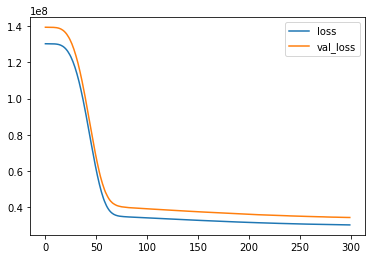

In [395]:
lossValue.plot()

In [396]:
preValue = model.predict(x_test)
preValue

12/12 [==============================] - 0s 890us/step


array([[ 9142.985 ],
       [ 9358.049 ],
       [ 5969.4814],
       [ 7452.9795],
       [ 7444.2744],
       [ 9358.994 ],
       [ 9141.631 ],
       [ 5105.8555],
       [12754.689 ],
       [ 8936.208 ],
       [ 8491.2705],
       [ 7660.2007],
       [ 7019.0776],
       [11257.129 ],
       [12096.81  ],
       [10624.058 ],
       [ 4271.6675],
       [13188.233 ],
       [ 8723.699 ],
       [10400.187 ],
       [10629.179 ],
       [12966.486 ],
       [ 9137.952 ],
       [13818.271 ],
       [ 4477.413 ],
       [13161.652 ],
       [12334.572 ],
       [ 4470.318 ],
       [13814.182 ],
       [10408.959 ],
       [12742.128 ],
       [ 7026.523 ],
       [ 9129.799 ],
       [ 8094.0625],
       [ 9140.35  ],
       [ 9361.095 ],
       [13375.046 ],
       [ 7444.2134],
       [12545.264 ],
       [ 8500.703 ],
       [ 7653.733 ],
       [11264.844 ],
       [11899.606 ],
       [ 5746.9717],
       [13793.841 ],
       [ 4268.851 ],
       [11456.507 ],
       [ 6179

In [397]:
mean_absolute_error(y_test,preValue)

4277.081122063829

In [398]:
dataFrame.describe()

,age,bmi,children,charges
count,1176.000000,1176.000000,1176.000000,1176.000000
mean,39.045918,30.087300,1.085034,9483.412419
std,13.989404,6.041278,1.214626,6565.954307
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.786250,0.000000,4348.852338
50%,39.000000,29.700000,1.000000,8246.436950
75%,51.000000,33.888750,2.000000,12629.348375
max,64.000000,53.130000,5.000000,29523.165600


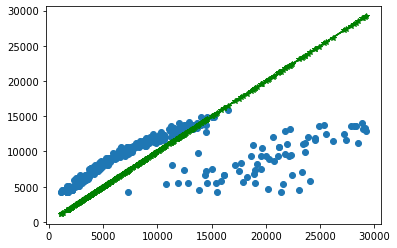

In [399]:
plt.scatter(y_test,preValue)
plt.plot(y_test,y_test,"g-*")

In [400]:
dataFrame.iloc[2]

age            53.00000
bmi            32.30000
children        2.00000
charges     29186.48236
Name: 696, dtype: float64

In [401]:
rPre = dataFrame.drop("charges",axis=1).iloc[2]
rPre = scaler.transform(rPre.values.reshape(-1,3))
model.predict(rPre)

1/1 [==============================] - 0s 24ms/step


array([[12952.416]], dtype=float32)

##### Veri seti tıbbi masraflar kısmı karmaşık şekilde dağılım göstermiş. Standart sapması yüksek. YSA katmanları ve epoch, deneme yanılma yöntemiyle ideal olan değeri bulmaya çalıştım. Ayrıca veri setinde bulunan 162 değeri (yaklaşık %12) veri setinden çıkardım. Çıkarmadığım durumda standart sapma daha da arttığı için tahmin sapma oranı %60-65 gibi bir seviyeye ulaştı. Şu anki sapma oranı ort. : %45